## Loading Datasets In

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

attacking_df = pd.read_csv('attacking.csv')
attempts_df = pd.read_csv('attempts.csv')
defending_df = pd.read_csv('defending.csv')
disciplinary_df = pd.read_csv('disciplinary.csv')
distribution_df = pd.read_csv('distribution.csv')
goals_df = pd.read_csv('goals.csv')
key_stats_df = pd.read_csv('key_stats.csv')

## Understanding the Data

In [42]:
# Check for missing values
print(attacking_df.isnull().sum())
print(attempts_df.isnull().sum())
print(defending_df.isnull().sum())
print(disciplinary_df.isnull().sum())
print(distribution_df.isnull().sum())
print(goals_df.isnull().sum())
print(key_stats_df.isnull().sum())

# Understand data types
print(attacking_df.dtypes)
print(attempts_df.dtypes)
print(defending_df.dtypes)
print(disciplinary_df.dtypes)
print(distribution_df.dtypes)
print(goals_df.dtypes)
print(key_stats_df.dtypes)

# Get summary statistics
print(attacking_df.describe())
print(attempts_df.describe())
print(defending_df.describe())
print(disciplinary_df.describe())
print(distribution_df.describe())
print(goals_df.describe())
print(key_stats_df.describe())


serial          0
player_name     0
club            0
position        0
assists         0
corner_taken    0
offsides        0
dribbles        0
match_played    0
dtype: int64
serial            0
player_name       0
club              0
position          0
total_attempts    0
on_target         0
off_target        0
blocked           0
match_played      0
dtype: int64
serial                 0
player_name            0
club                   0
position               0
balls_recoverd         0
tackles                0
t_won                  0
t_lost                 0
clearance_attempted    0
match_played           0
dtype: int64
serial             0
player_name        0
club               0
position           0
fouls_committed    0
fouls_suffered     0
red                0
yellow             0
minutes_played     0
match_played       0
dtype: int64
serial             0
player_name        0
club               0
position           0
pass_accuracy      0
pass_attempted     0
pass_completed     0

In [43]:
# Convert distance_covered to numeric, coercing errors to NaN
key_stats_df['distance_covered'] = pd.to_numeric(key_stats_df['distance_covered'], errors='coerce')

# Check if any values were converted to NaN
print(key_stats_df['distance_covered'].isnull().sum())

# If there are any NaNs, decide on a method to handle them. For example, you could fill them with the median:
# key_stats_df['distance_covered'].fillna(key_stats_df['distance_covered'].median(), inplace=True)


2


In [44]:
# Example of merging the attacking_df with key_stats_df on 'player_name', 'club', and 'position'
combined_df = pd.merge(attacking_df, key_stats_df, on=['player_name', 'club', 'position'], how='inner')

# Merging attempts data
combined_df = pd.merge(combined_df, attempts_df[['player_name', 'club', 'position', 'total_attempts']], on=['player_name', 'club', 'position'], how='left')

# Merging defending data
combined_df = pd.merge(combined_df, defending_df[['player_name', 'club', 'position', 'balls_recoverd', 't_won']], on=['player_name', 'club', 'position'], how='left')

# Merging disciplinary data
combined_df = pd.merge(combined_df, disciplinary_df[['player_name', 'club', 'position', 'fouls_committed', 'fouls_suffered', 'red', 'yellow']], on=['player_name', 'club', 'position'], how='left')

# Merging distribution data
combined_df = pd.merge(combined_df, distribution_df[['player_name', 'club', 'position', 'pass_completed', 'pass_attempted']], on=['player_name', 'club', 'position'], how='left')

# Check the columns of the updated combined_df
print(combined_df.columns)



Index(['serial', 'player_name', 'club', 'position', 'assists_x',
       'corner_taken', 'offsides', 'dribbles', 'match_played_x',
       'minutes_played', 'match_played_y', 'goals', 'assists_y',
       'distance_covered', 'total_attempts', 'balls_recoverd', 't_won',
       'fouls_committed', 'fouls_suffered', 'red', 'yellow', 'pass_completed',
       'pass_attempted'],
      dtype='object')


In [45]:
# Fill NaN values with the median
key_stats_df['distance_covered'].fillna(key_stats_df['distance_covered'].median(), inplace=True)


In [46]:
# Rename columns to be more descriptive
combined_df.rename(columns={'assists_x': 'assists', 
                            'match_played_x': 'matches_played_attacking',
                            'match_played_y': 'matches_played_key_stats',
                            'goals': 'goals_key_stats', 
                            'assists_y': 'assists_key_stats'}, inplace=True)


## Identify the Most Influential Players

In [47]:
combined_df['influence_score'] = (combined_df['assists'] + combined_df['goals_key_stats']) / combined_df['minutes_played']


In [48]:
# Sort by influence score
influential_players = combined_df.sort_values(by='influence_score', ascending=False)

# Display top 10 influential players
print(influential_players[['player_name', 'club', 'position', 'influence_score']].head(10))


         player_name         club    position  influence_score
174         Stanišić       Bayern    Defender         0.047619
175         Bernardo     Salzburg    Defender         0.043478
165            Novoa      Leipzig  Midfielder         0.041667
158    Al. Miranchuk     Atalanta     Forward         0.030303
52            Werner      Chelsea     Forward         0.024390
20       Lewandowski       Bayern     Forward         0.018265
33   Pedro Gonçalves  Sporting CP  Midfielder         0.018237
104           Haller         Ajax     Forward         0.017964
88            Dybala     Juventus     Forward         0.015686
2               Sané       Bayern  Midfielder         0.015038


## Goal Conversion Rate

In [49]:
# Assuming 'total_attempts' is available from the attempts_df and it is already merged with other data
combined_df['conversion_rate'] = combined_df['goals_key_stats'] / combined_df['total_attempts']

# Display top 10 players with the best conversion rates (minimum 10 shots)
top_conversion_rates = combined_df[combined_df['total_attempts'] > 10].sort_values(by='conversion_rate', ascending=False)
print(top_conversion_rates[['player_name', 'club', 'position', 'conversion_rate']].head(10))


         player_name         club    position  conversion_rate
104           Haller         Ajax     Forward         0.458333
20       Lewandowski       Bayern     Forward         0.419355
86           Benzema  Real Madrid     Forward         0.333333
43         Griezmann     Atlético     Forward         0.333333
33   Pedro Gonçalves  Sporting CP  Midfielder         0.307692
13            Müller       Bayern     Forward         0.285714
88            Dybala     Juventus     Forward         0.250000
89           Vanaken  Club Brugge  Midfielder         0.250000
40           Danjuma   Villarreal  Midfielder         0.240000
97              Mané    Liverpool  Midfielder         0.238095


## Defensive Actions

In [50]:
# Assuming the defending data is also merged into combined_df
combined_df['defensive_score'] = combined_df['balls_recoverd'] + combined_df['t_won']

# Display top 10 defenders by defensive score
top_defenders = combined_df.sort_values(by='defensive_score', ascending=False)
print(top_defenders[['player_name', 'club', 'position', 'defensive_score']].head(10))


          player_name         club    position  defensive_score
166      Thiago Silva      Chelsea    Defender             69.0
113          Van Dijk    Liverpool    Defender             64.0
10             Capoue   Villarreal  Midfielder             63.0
21       João Cancelo    Man. City    Defender             62.0
112            Pavard       Bayern    Defender             62.0
145        Vertonghen      Benfica    Defender             57.0
118          Carvajal  Real Madrid    Defender             56.0
11             Parejo   Villarreal  Midfielder             56.0
147          Martínez         Ajax    Defender             55.0
4    Alexander-Arnold    Liverpool    Defender             51.0


## Player Discipline

In [51]:
combined_df['discipline_score'] = combined_df['fouls_committed'] - combined_df['fouls_suffered'] + (combined_df['red'] * 3 + combined_df['yellow'])
# Display top 10 players with the worst discipline scores
worst_discipline = combined_df.sort_values(by='discipline_score', ascending=False)
print(worst_discipline[['player_name', 'club', 'position', 'discipline_score']].head(10))


      player_name         club    position  discipline_score
63        Seiwald     Salzburg  Midfielder              22.0
118      Carvajal  Real Madrid    Defender              18.0
83         Milner    Liverpool  Midfielder              17.0
51          Ikoné         LOSC  Midfielder              16.0
21   João Cancelo    Man. City    Defender              16.0
100         Jesus    Man. City     Forward              15.0
109    Kristensen     Salzburg    Defender              13.0
10         Capoue   Villarreal  Midfielder              12.0
99     Diogo Jota    Liverpool     Forward              11.0
150         Hefti   Young Boys    Defender              11.0


## Passing Efficiency

In [52]:
combined_df['pass_efficiency'] = combined_df['pass_completed'] / combined_df['pass_attempted']

# Display top 10 players by pass efficiency (minimum 50 passes attempted)
most_efficient_passers = combined_df[combined_df['pass_attempted'] > 50].sort_values(by='pass_efficiency', ascending=False)
print(most_efficient_passers[['player_name', 'club', 'position', 'pass_efficiency']].head(10))


        player_name              club    position  pass_efficiency
166    Thiago Silva           Chelsea    Defender         0.940692
147        Martínez              Ajax    Defender         0.939169
160     Christensen           Chelsea    Defender         0.936594
167      Marquinhos             Paris    Defender         0.933202
17   Bernardo Silva         Man. City  Midfielder         0.924242
47         Jorginho           Chelsea  Midfielder         0.919075
173        Kryvtsov  Shakhtar Donetsk    Defender         0.916168
163          Danilo          Juventus    Defender         0.914365
113        Van Dijk         Liverpool    Defender         0.913043
57            Mendy       Real Madrid    Defender         0.910412


## Clustering Players Based on Performance

In [53]:
# Define bins manually based on your data's distribution
goal_bins = [-1, 1, 5, 15]  # Adjust based on actual distribution; -1 includes 0 in the first bin
assist_bins = [-1, 1, 5, 20]  # These are hypothetical; adjust as needed
attempt_bins = [-1, 10, 30, 100]  # These are hypothetical; adjust as needed

# Using pd.cut for goals, assists, and total attempts
combined_df['goals_category'] = pd.cut(combined_df['goals_key_stats'], bins=goal_bins, labels=['Low', 'Medium', 'High'])
combined_df['assists_category'] = pd.cut(combined_df['assists'], bins=assist_bins, labels=['Low', 'Medium', 'High'])
combined_df['attempts_category'] = pd.cut(combined_df['total_attempts'], bins=attempt_bins, labels=['Low', 'Medium', 'High'])

# Display the new categories
print(combined_df[['player_name', 'goals_category', 'assists_category', 'attempts_category']].head())



        player_name goals_category assists_category attempts_category
0   Bruno Fernandes            Low             High            Medium
1   Vinícius Júnior         Medium             High            Medium
2              Sané           High             High              High
3            Antony         Medium           Medium            Medium
4  Alexander-Arnold            Low           Medium            Medium


## Performance Profile Analysis


In [54]:
# Count the frequency of each combination of categories
profile_counts = combined_df.groupby(['goals_category', 'assists_category', 'attempts_category']).size().reset_index(name='Count')

# Display the profile counts sorted by the most common profiles
profile_counts = profile_counts.sort_values(by='Count', ascending=False)
print(profile_counts)


   goals_category assists_category attempts_category  Count
0             Low              Low               Low     80
3             Low           Medium               Low     25
13         Medium           Medium            Medium     16
10         Medium              Low            Medium     10
4             Low           Medium            Medium      9
1             Low              Low            Medium      7
9          Medium              Low               Low      4
12         Medium           Medium               Low      4
23           High           Medium              High      3
22           High           Medium            Medium      2
26           High             High              High      1
19           High              Low            Medium      1
7             Low             High            Medium      1
16         Medium             High            Medium      1
20           High              Low              High      1
25           High             High      

## Visualisation of Performance Categories


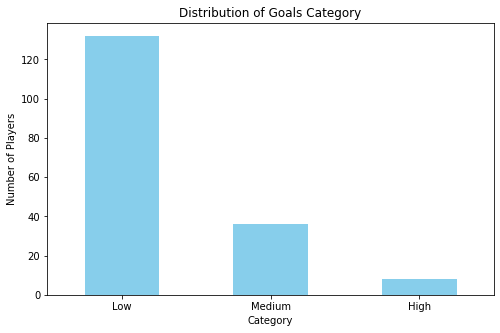

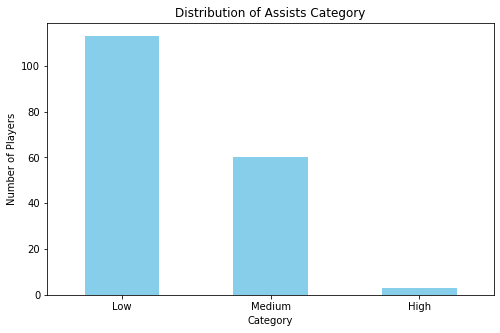

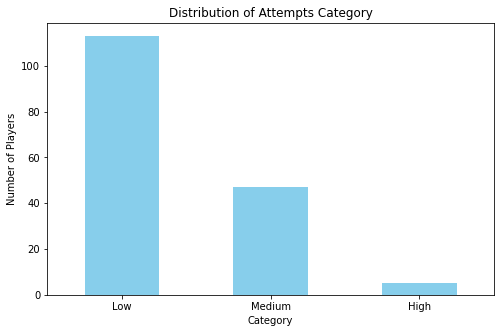

In [55]:
# Function to plot category distribution
def plot_category_distribution(df, category, title):
    plt.figure(figsize=(8, 5))
    df[category].value_counts().plot(kind='bar', color='skyblue')
    plt.title(title)
    plt.xlabel('Category')
    plt.ylabel('Number of Players')
    plt.xticks(rotation=0)
    plt.show()

# Plot distribution for goals category
plot_category_distribution(combined_df, 'goals_category', 'Distribution of Goals Category')

# Plot distribution for assists category
plot_category_distribution(combined_df, 'assists_category', 'Distribution of Assists Category')

# Plot distribution for attempts category
plot_category_distribution(combined_df, 'attempts_category', 'Distribution of Attempts Category')


## Advanced Passing Metrics Analysis

In [56]:
# Calculate pass completion rate
combined_df['pass_completion_rate'] = combined_df['pass_completed'] / combined_df['pass_attempted']

# Display pass completion rate
print(combined_df[['player_name', 'club', 'pass_completion_rate']].head())


        player_name         club  pass_completion_rate
0   Bruno Fernandes  Man. United              0.771605
1   Vinícius Júnior  Real Madrid              0.835920
2              Sané       Bayern              0.869347
3            Antony         Ajax              0.813665
4  Alexander-Arnold    Liverpool              0.811679


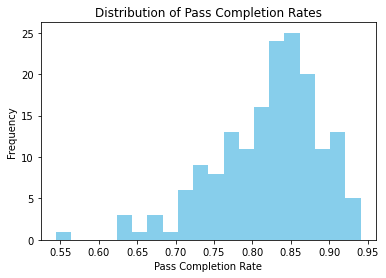

In [57]:

# Plot the distribution of pass completion rates
plt.hist(combined_df['pass_completion_rate'].dropna(), bins=20, color='skyblue')
plt.title('Distribution of Pass Completion Rates')
plt.xlabel('Pass Completion Rate')
plt.ylabel('Frequency')
plt.show()


## Top Players by Pass Attempts

In [58]:
# Display top players by pass attempts
top_passers = combined_df.sort_values(by='pass_attempted', ascending=False).head(10)
print(top_passers[['player_name', 'club', 'pass_attempted', 'pass_completed', 'pass_completion_rate']])


          player_name         club  pass_attempted  pass_completed  \
6              Modrić  Real Madrid           799.0           723.0   
4    Alexander-Arnold    Liverpool           685.0           556.0   
112            Pavard       Bayern           676.0           613.0   
147          Martínez         Ajax           674.0           633.0   
21       João Cancelo    Man. City           668.0           586.0   
113          Van Dijk    Liverpool           667.0           609.0   
11             Parejo   Villarreal           657.0           560.0   
24          Robertson    Liverpool           628.0           512.0   
166      Thiago Silva      Chelsea           607.0           571.0   
59          Henderson    Liverpool           602.0           530.0   

     pass_completion_rate  
6                0.904881  
4                0.811679  
112              0.906805  
147              0.939169  
21               0.877246  
113              0.913043  
11               0.852359  
24   

## Top Players Throughout The Competition

In [62]:
combined_df['goals_per_90'] = (combined_df['goals_key_stats'] / combined_df['minutes_played']) * 90
combined_df['assists_per_90'] = (combined_df['assists'] / combined_df['minutes_played']) * 90
combined_df['defensive_actions_per_90'] = (combined_df['balls_recoverd'] / combined_df['minutes_played']) * 90
combined_df['pass_completion_rate'] = combined_df['pass_completed'] / combined_df['pass_attempted']


# Create a simple average of the normalized metrics for now
combined_df['impact_score'] = (combined_df['goals_per_90'] + combined_df['assists_per_90'] + 
                               combined_df['defensive_actions_per_90'] + 
                               combined_df['pass_completion_rate']) / 4



In [63]:
# Top 10 performers based on impact score
top_performers = combined_df.sort_values(by='impact_score', ascending=False).head(10)
print(top_performers[['player_name', 'club', 'position', 'goals_per_90', 'assists_per_90', 'defensive_actions_per_90', 'pass_completion_rate', 'impact_score']])


      player_name        club    position  goals_per_90  assists_per_90  \
172       Schuurs        Ajax    Defender      0.000000        0.616438   
126      Palomino    Atalanta    Defender      0.200000        0.200000   
166  Thiago Silva     Chelsea    Defender      0.000000        0.118890   
120       Meunier    Dortmund    Defender      0.000000        0.185950   
144    De Sciglio    Juventus    Defender      0.000000        0.314685   
27       Tsimikas   Liverpool    Defender      0.000000        0.523256   
60          Vidal       Inter  Midfielder      0.220049        0.440098   
164    Tagliafico        Ajax    Defender      0.000000        0.647482   
113      Van Dijk   Liverpool    Defender      0.000000        0.111111   
96         Aurier  Villarreal    Defender      0.000000        0.697674   

     defensive_actions_per_90  pass_completion_rate  impact_score  
172                  8.013699              0.891892      2.380507  
126                  8.200000         

AttributeError: 'PolarAxesSubplot' object has no attribute 'set_varlabels'

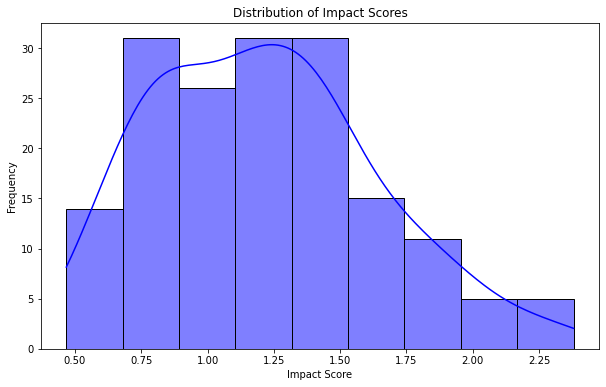

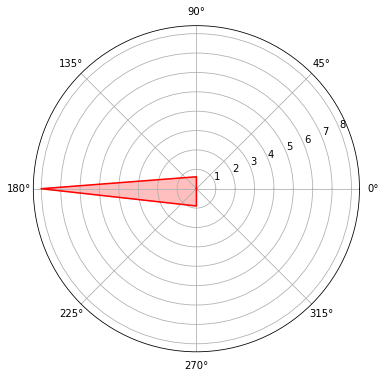

In [65]:
import seaborn as sns

# Distribution of Impact Scores
plt.figure(figsize=(10, 6))
sns.histplot(combined_df['impact_score'], kde=True, color='blue')
plt.title('Distribution of Impact Scores')
plt.xlabel('Impact Score')
plt.ylabel('Frequency')

# Ensure the labels match exactly the DataFrame's column names
labels = np.array(['goals_per_90', 'assists_per_90', 'defensive_actions_per_90', 'pass_completion_rate'])

# Selecting the first entry for demonstration or loop over top performers as needed
top_performer = top_performers.head(1)
stats = top_performer[labels].values.flatten().tolist()
angles = np.linspace(0, 2 * np.pi, len(labels), endpoint=False).tolist()  # Close the loop
stats += stats[:1]  # Repeat the first value to close the radial chart
angles += angles[:1]

fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
ax.fill(angles, stats, color='red', alpha=0.25)
ax.plot(angles, stats, color='red')  # Add the line plot
ax.set_varlabels(labels)

plt.title('Top Performer Radar Chart')
plt.show()

